<a href="https://colab.research.google.com/github/r4phael/ml-course/blob/master/data/preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the libraries

In [0]:
import pandas as pd
import random
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold


Defining Functions

In [0]:
def k_fold_cv(indexes, k = 5, seed = 42):
    
    size = len(indexes)
    subset_size = round(size / k)
    random.Random(seed).shuffle(indexes)
    subsets = [indexes[x:x+subset_size] for x in range(0, len(indexes), subset_size)]
    kfolds = []
    for i in range(k):
        test = subsets[i]
        train = []
        for subset in subsets:
            if subset != test:
                train.append(subset)
        kfolds.append((train,test))
        
    return kfolds

Importing and exploring the dataset

In [6]:
data_url = 'https://raw.githubusercontent.com/r4phael/ml-course/master/data/preprocessing_data.csv'

df = pd.read_csv(data_url)

df.describe()

df.head(5)

,City,Age,Salary,Sex,Acquired
0,Maceio,42.0,6500.0,M,No
1,Sao Paulo,21.0,4300.0,F,Yes
2,Brasilia,28.0,4900.0,F,No
3,Recife,35.0,5400.0,F,No
4,Rio de Janeiro,38.0,NaN,M,Yes


Distribution of nuimeric variables

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7197d60048>,
      dtype=object)

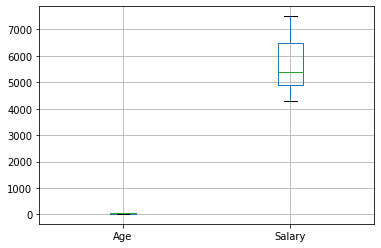

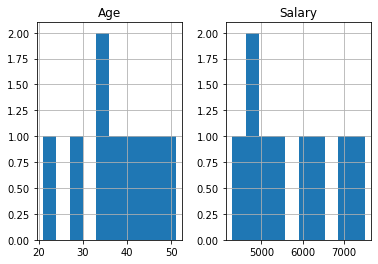

In [7]:
df.boxplot()

df.hist()

Fill NA with 0, median or mean.

In [0]:
df.fillna(df.mean())

df.fillna(df.median())

df.fillna(0)

df = df.fillna(df.median())

Defining the dependend and dependent variables

In [0]:
X = df.iloc[:, :-1].values
y = df.iloc[:, 4].values


Encoding the labels with value between 0 and n_classes-1. Fit and Transform  the values.

In [0]:
le = LabelEncoder()

y = df.iloc[:, 4].values
y = le.fit_transform(y)


Some machine learning techniques require you to drop one dimension from the epresentation so as o avoid dependency among the variables. Use drop_first=True" to achieve that.

In [0]:
X = pd.get_dummies(df.iloc[:, :-1] ,prefix=['city', 'sex'], drop_first=True).values
y = df.iloc[:, 4].values

K-fold cross validation with 5 folds:

In [12]:
k_fold_cv(list(df.index.values))

[([[2, 8], [5, 6], [9, 4], [0, 1]], [7, 3]),
 ([[7, 3], [5, 6], [9, 4], [0, 1]], [2, 8]),
 ([[7, 3], [2, 8], [9, 4], [0, 1]], [5, 6]),
 ([[7, 3], [2, 8], [5, 6], [0, 1]], [9, 4]),
 ([[7, 3], [2, 8], [5, 6], [9, 4]], [0, 1])]

5-folds cross validation with sklearn

In [19]:
kf = KFold(n_splits=5, random_state=42, shuffle=True)
for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    #X_train, X_test = X[train_index], X[test_index]
    #y_train, y_test = y[train_index], y[test_index]

TRAIN: [0 2 3 4 5 6 7 9] TEST: [1 8]
TRAIN: [1 2 3 4 6 7 8 9] TEST: [0 5]
TRAIN: [0 1 3 4 5 6 8 9] TEST: [2 7]
TRAIN: [0 1 2 3 5 6 7 8] TEST: [4 9]
TRAIN: [0 1 2 4 5 7 8 9] TEST: [3 6]


 Splitting the dataset in train and tests splits

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

Feature scaling of independent variables

In [16]:
sc = StandardScaler()
X = sc.fit_transform(X)

X

array([[ 0.62112999,  0.80160482, -0.33333333, -0.33333333, -0.33333333,
         3.        , -0.33333333, -0.33333333, -0.33333333, -0.33333333,
        -0.33333333,  1.        ],
       [-1.98761598, -1.40280843, -0.33333333, -0.33333333, -0.33333333,
        -0.33333333, -0.33333333, -0.33333333, -0.33333333, -0.33333333,
         3.        , -1.        ],
       [-1.11803399, -0.80160482,  3.        , -0.33333333, -0.33333333,
        -0.33333333, -0.33333333, -0.33333333, -0.33333333, -0.33333333,
        -0.33333333, -1.        ],
       [-0.248452  , -0.30060181, -0.33333333, -0.33333333, -0.33333333,
        -0.33333333, -0.33333333, -0.33333333,  3.        , -0.33333333,
        -0.33333333, -1.        ],
       [ 0.124226  , -0.30060181, -0.33333333, -0.33333333, -0.33333333,
        -0.33333333, -0.33333333, -0.33333333, -0.33333333,  3.        ,
        -0.33333333,  1.        ],
       [-0.49690399, -0.50100301, -0.33333333,  3.        , -0.33333333,
        -0.33333333, -